temperature: 25.76
gas: 7913.0
Timestamp: 12-05 01:29:37
temperature: 25.77
gas: 7943.0
Timestamp: 12-05 01:29:42
temperature: 25.77
gas: 7931.0
Timestamp: 12-05 01:29:47
temperature: 25.77
gas: 7913.0
Timestamp: 12-05 01:29:52
temperature: 25.77
gas: 7895.0
Timestamp: 12-05 01:29:57
        timestamp  temperature     gas         place
0  12-05 01:29:37        25.76  7913.0  dongyangHome
1  12-05 01:29:42        25.77  7943.0  dongyangHome
2  12-05 01:29:47        25.77  7931.0  dongyangHome
3  12-05 01:29:52        25.77  7913.0  dongyangHome
4  12-05 01:29:57        25.77  7895.0  dongyangHome


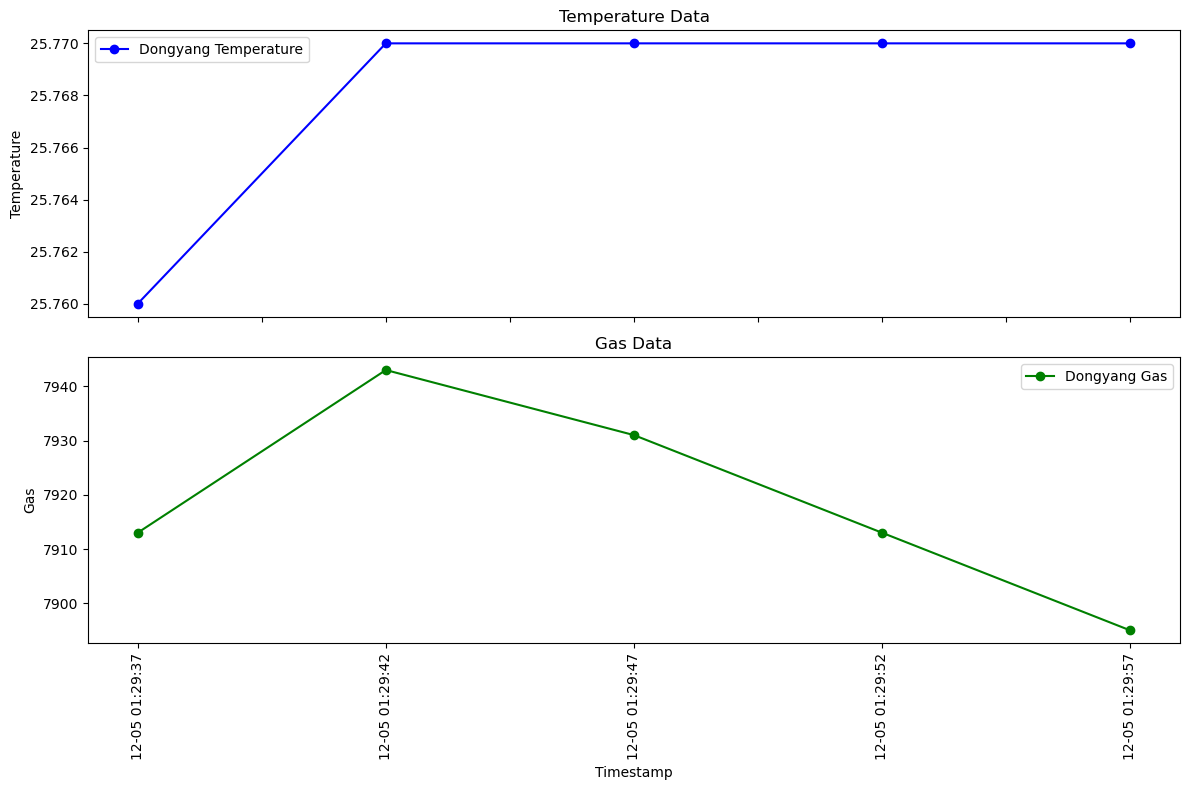

In [ ]:
import paho.mqtt.subscribe as subscribe
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime  # use to record the exact time
import time

dongyangtopics = ['dongyangtest1', 'dongyangtest2']

# set the counting times
counts = 5
temperature = []
gas = []
times = []

for n in range(counts):
    # getting data from mqtt server inside the loop to fetch fresh data each time
    dongyangdata = subscribe.simple(dongyangtopics, hostname="pf-eveoxy0ua6xhtbdyohag.cedalo.cloud", retained=False, msg_count=len(dongyangtopics))

    data1 = []
    for a in dongyangdata:
        data1.append(float(a.payload))
    
    # append the new data to the lists
    temperature.append(float(data1[0]))
    gas.append(float(data1[1]))
    times.append(datetime.now().strftime("%m-%d %H:%M:%S")) 
    
    # print real-time data after each collection
    print(f"temperature: {temperature[-1]}")
    print(f"gas: {gas[-1]}")
    print(f"Timestamp: {times[-1]}")
    time.sleep(1)  # the time(s) delay after one collection

# create the pandas database and name the columns
df = pd.DataFrame({ 
    'timestamp': times,
    'temperature': temperature,
    'gas': gas,  
    'place': ['dongyangHome'] * len(times),
})
print(df)

# save the data and cover the original data
df.to_csv('output.csv', index=False)
# if need to not cover the data, and append the data, use the following code
# df.to_csv('output.csv', mode='a', index=False, header=not pd.io.common.file_exists('output.csv'))


# read the csv data
df = pd.read_csv('output.csv')

# plot the graph
plt.figure(figsize=(12, 8))

# graph1: temperature
plt.subplot(2, 1, 1)
plt.plot(df['temperature'], label='Dongyang Temperature', marker='o', color='blue')
plt.title("Temperature Data")
plt.tick_params(labelbottom=False)  # delete xlabel
plt.ylabel("Temperature")
plt.xticks(rotation=90)
plt.legend()

# graph2: gas
plt.subplot(2, 1, 2)
plt.plot(df['timestamp'], df['gas'], label='Dongyang Gas', marker='o', color='green')
plt.title("Gas Data")
plt.xlabel("Timestamp")
plt.ylabel("Gas")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()
